### Task 1b: Build a logistic regression model

#### (1) create a visualization of the data

In [5]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\Suyash Kalwani\Downloads\student_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


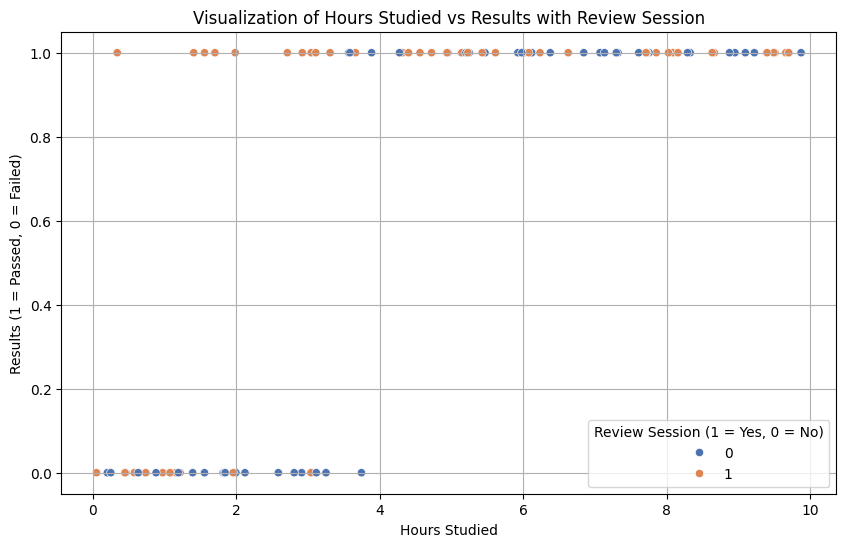

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create visualizations
plt.figure(figsize=(10, 6))

# Plotting Hours_Studied against Results
sns.scatterplot(x='Hours_Studied', y='Results', hue='Review_Session', data=data, palette='deep')

plt.title("Visualization of Hours Studied vs Results with Review Session")
plt.xlabel("Hours Studied")
plt.ylabel("Results (1 = Passed, 0 = Failed)")
plt.legend(title="Review Session (1 = Yes, 0 = No)")
plt.grid(True)
plt.show()

### 1 B (2).Fit a model using logistic regression  1 B (3) output model coefficients and performance metrics such as accuracy and AUC and ROC

In [13]:
###### from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import numpy as np

# Prepare the data for the model
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Initialize and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Predict the results using the same dataset
y_pred = log_reg.predict(X)
y_prob = log_reg.predict_proba(X)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)

# Output model coefficients and performance metrics
coefficients = log_reg.coef_
intercept = log_reg.intercept_

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, y_prob)

{
    "coefficients": coefficients,
    "intercept": intercept,
    "accuracy": accuracy,
    "AUC": auc
}

{'coefficients': array([[1.36542016, 1.87797591]]),
 'intercept': array([-4.61373892]),
 'accuracy': 0.93,
 'AUC': 0.9761029411764706}

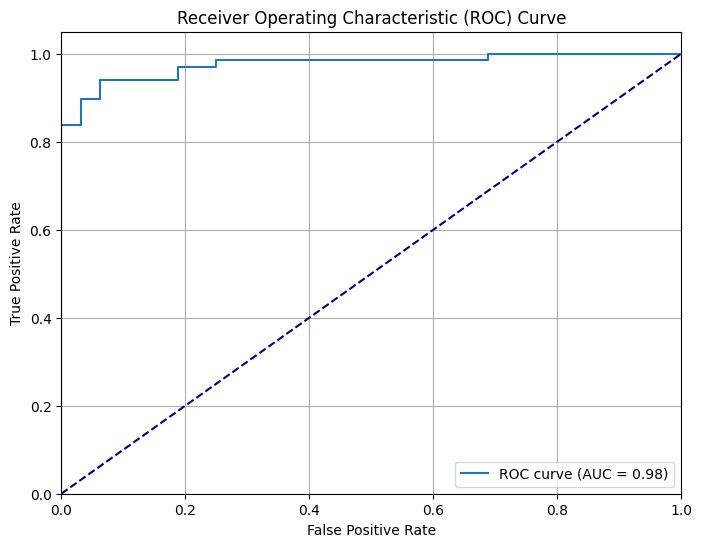

In [8]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Task 2:  Understanding and Prevent Overfitting in the context of SVM

In [11]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load your dataset
file_path = r'C:\Users\Suyash Kalwani\Downloads\student_data.csv'  # Update with your local file path
data = pd.read_csv(file_path)

# Prepare the features (X) and target (y)
X = data[['Hours_Studied', 'Review_Session']]  # Independent variables
y = data['Results']  # Target variable

# Initialize SVM with a linear kernel
linear_svm = SVC(kernel='linear')

# Fit the model
linear_svm.fit(X, y)

# Predict using the same dataset (for simplicity)
y_pred_linear = linear_svm.predict(X)

# Evaluate the linear SVM
print("Linear Kernel SVM Accuracy: ", accuracy_score(y, y_pred_linear))
print("Classification Report for Linear Kernel SVM:\n", classification_report(y, y_pred_linear))


Linear Kernel SVM Accuracy:  0.92
Classification Report for Linear Kernel SVM:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89        32
           1       0.98      0.90      0.94        68

    accuracy                           0.92       100
   macro avg       0.90      0.93      0.91       100
weighted avg       0.93      0.92      0.92       100



In [12]:
# Initialize SVM with an RBF kernel
rbf_svm = SVC(kernel='rbf')

# Define a parameter grid for grid search (testing different values of gamma and C)
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.01, 0.1, 1, 10, 100]  # Gamma values to test
}

# Perform grid search with k-fold cross-validation (k=5)
grid_search = GridSearchCV(rbf_svm, param_grid, cv=5, scoring='accuracy')

# Fit the grid search model
grid_search.fit(X, y)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Output the best parameters found
print("Best Parameters from Grid Search: ", best_params)

# Predict using the best model from grid search
y_pred_rbf = grid_search.best_estimator_.predict(X)

# Evaluate the RBF kernel SVM with the best parameters
print("RBF Kernel SVM Accuracy with Best Gamma: ", accuracy_score(y, y_pred_rbf))
print("Classification Report for RBF Kernel SVM:\n", classification_report(y, y_pred_rbf))


Best Parameters from Grid Search:  {'C': 1, 'gamma': 0.1}
RBF Kernel SVM Accuracy with Best Gamma:  0.93
Classification Report for RBF Kernel SVM:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.97      0.93      0.95        68

    accuracy                           0.93       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.93      0.93       100

